In [70]:
import sys
sys.path.append('../')
from utils import utils
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score


In [71]:
digits = load_digits()
print(digits.data.shape)
## 8 x 8 px images vectorized to 64 features
data = digits.data


(1797, 64)


Target class: 0


<Figure size 640x480 with 0 Axes>

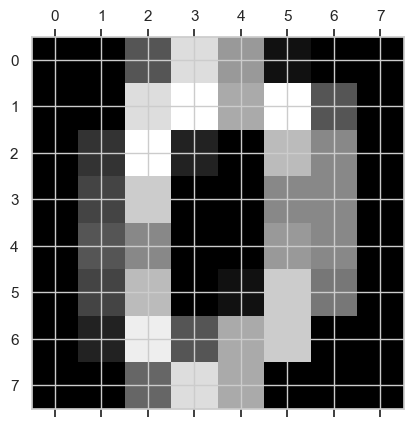

In [72]:
print("Target class:",digits.target[0])
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [73]:
n_components = 10  # You can adjust the number of components as needed | 0 - 9 digits
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(data)

GaussianMixture(n_components=10, random_state=0)

In [76]:
# Step 3: Generate new data points from the trained GMM
n_samples = 4  # You can adjust the number of samples to generate

# Generate new data points
new_data, _ = gmm.sample(n_samples)

predicted_classes = []
for sample in new_data:
    distances = [np.linalg.norm(sample - gmm.means_[i]) for i in range(n_components)]
    predicted_class = np.argmin(distances)
    predicted_classes.append(predicted_class)

# Reshape the generated data to be compatible with the original dataset
new_data = new_data.reshape((n_samples, 8, 8))

predicted_classes


[5, 7, 8, 8]

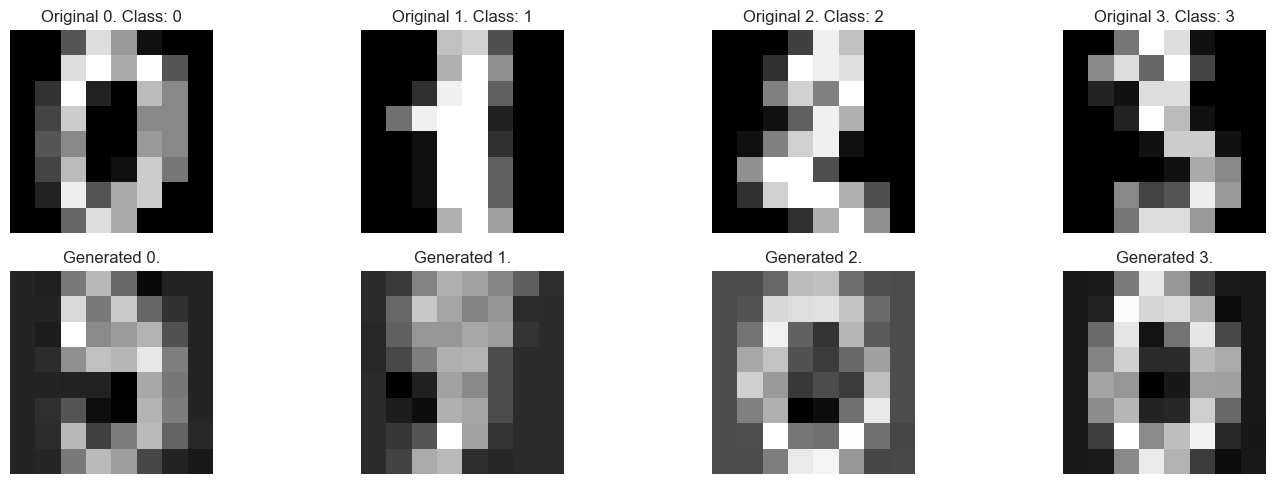

In [ ]:
# Plot the original digits and the generated digits
plt.figure(figsize=(15, 5))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(data[i].reshape(8, 8), cmap='gray')
    plt.title(f'Original {i}. Class: {digits.target[i]}')
    plt.axis('off')
    
    plt.subplot(2, n_samples, n_samples + i + 1)
    plt.imshow(new_data[i], cmap='gray')
    plt.title(f'Generated {i}.')
    plt.axis('off')

plt.tight_layout()
plt.show()